In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

$f_{w,b}(x^{(i)}) = wx^{(i)}+b$ 

Problem Stetement

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |


In [2]:
x_train = np.array([1,2])

In [3]:
x_train

array([1, 2])

In [4]:
y_train = np.array([300, 500])

In [5]:
y_train

array([300, 500])

In [6]:
x_train.shape

(2,)

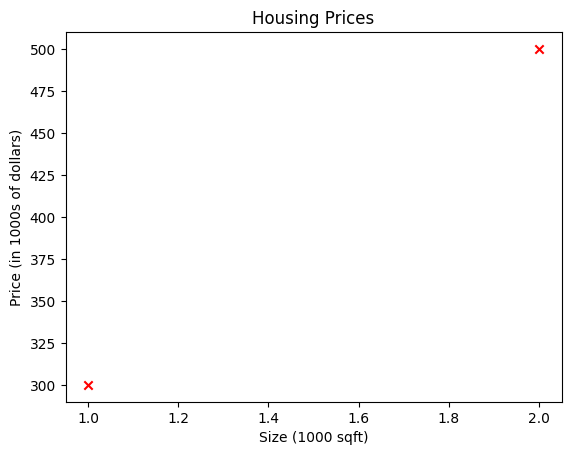

In [7]:
plt.scatter(x_train, y_train, marker = 'x', c = 'r')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (in 1000s of dollars)')
plt.title('Housing Prices')
plt.show()


final expectation - come up with blue line

Text(0.5, 1.0, 'Housing Prices')

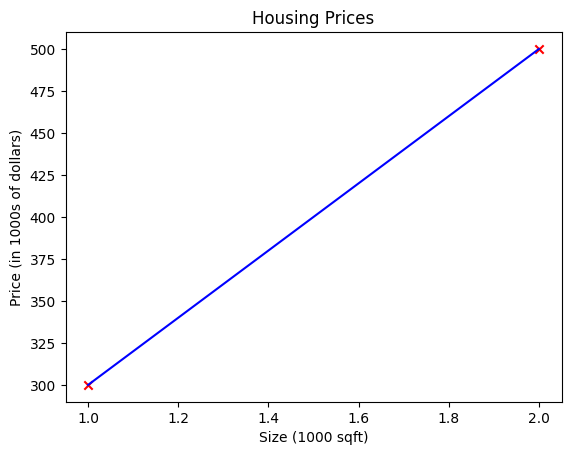

In [8]:
plt.scatter(x_train, y_train, marker = 'x', c = 'r')
plt.plot(x_train, y_train, c = 'b')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (in 1000s of dollars)')
plt.title('Housing Prices')

In [9]:
#predicted w and b
w = 100
b = 100

In [10]:
y_pred = np.array([(w*x_train[0] + b), (w*x_train[1] + b)])
y_pred

array([200, 300])

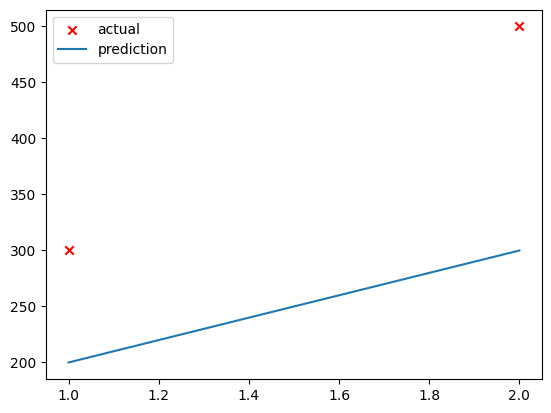

In [11]:
#predicted line
plt.scatter(x_train, y_train, c = 'r', marker= 'x', 
            label = 'actual')
plt.plot (x_train, y_pred, label = 'prediction')
plt.legend()

replace y_pred with function output

In [12]:
def compute_model_output(x, w, b):
    y_pred = []
    m = len(x)
    for i in range(m):
        y_pred.append(w * x[i] + b)
    return y_pred


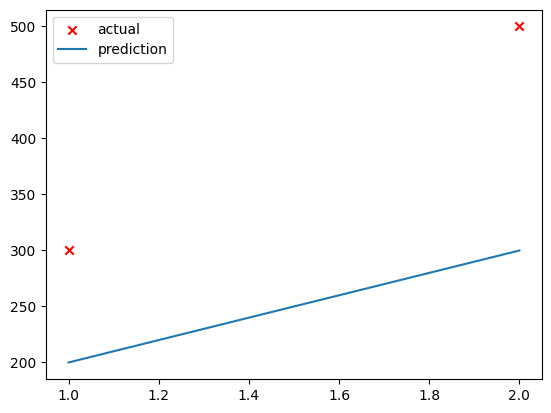

In [13]:
#predicted line
plt.scatter(x_train, y_train, c = 'r', marker= 'x', label = 'actual')
plt.plot (x_train, compute_model_output(x_train, w, b), label = 'prediction')
plt.legend()

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

In [14]:
def compute_cost(x, y, w, b): 
    m = len(x)
    j_wb = 0
    y_pred = compute_model_output(x, w, b)
    for i in range(m):
        j_i = (y_pred[i] - y[i])**2
        j_wb = j_wb + j_i
    return j_wb/(2 * m)


In [15]:
compute_cost(x_train, y_train, 100, 100)

np.float64(12500.0)

In [16]:
w_list = np.linspace(100, 400, 13)
w_list

array([100., 125., 150., 175., 200., 225., 250., 275., 300., 325., 350.,
       375., 400.])

In [17]:
#create numpy array by applying 
# function compute_cost on each member 
# of w_list
cost_values = np.array([compute_cost(x_train, y_train, w, 0) for w in w_list])
cost_values

array([32500.  , 23281.25, 15625.  ,  9531.25,  5000.  ,  2031.25,
         625.  ,   781.25,  2500.  ,  5781.25, 10625.  , 17031.25,
       25000.  ])

Text(0, 0.5, 'cost')

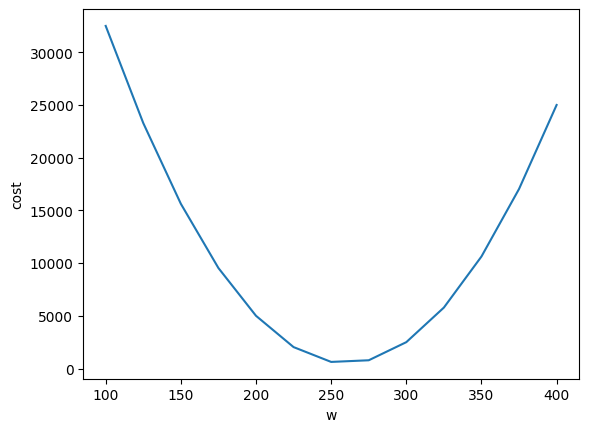

In [18]:
plt.plot(w_list, cost_values)
plt.xlabel('w')
plt.ylabel('cost')


*gradient descent* is described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
 
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

In [19]:
def compute_gradient(x, y, w, b):
    m = len(x)
    y_pred = compute_model_output(x, w, b) 
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        dj_dw = dj_dw + (y_pred[i] - y[i])*x[i]
        dj_db = dj_db + (y_pred[i] - y[i])
    return dj_dw/m, dj_db/m

In [20]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = w_in
    b = b_in
    w_list = []
    cost_list = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        w_list.append(w)
        cost_list.append(cost_function(x, y, w, b))

    plt.plot(w_list, cost_list)
    plt.xlabel('w')
    plt.ylabel('cost')

    print('w = ', w)
    print('b = ', b)

w =  199.99285075131766
b =  100.011567727362


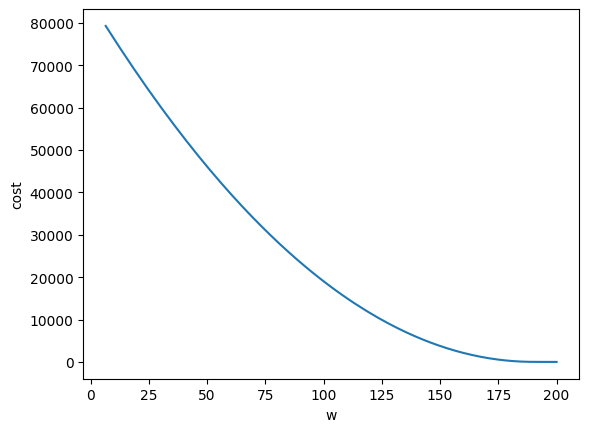

In [21]:
w_in = 0
b_in= 0
num_iters = 10000
alpha = 1.0e-2

gradient_descent(x_train, y_train, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient)

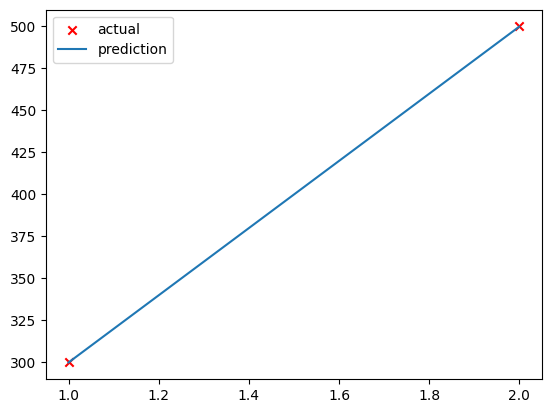

In [22]:
#predicted line
plt.scatter(x_train, y_train, c = 'r', marker= 'x', label = 'actual')
plt.plot (x_train, compute_model_output(x_train, 199.99, 100.01), label = 'prediction')
plt.legend()

In [23]:
house_size_sqft = 1200
w_pred = 199.99
b_pred = 100.01
predicted_house_price =  ((w_pred * house_size_sqft/1000) + b_pred) * 1000
print(f'predicted price of house with {house_size_sqft} sqft is {predicted_house_price} dollars')

predicted price of house with 1200 sqft is 339998.0 dollars


w =  200.04783601166767
b =  99.92259970723546


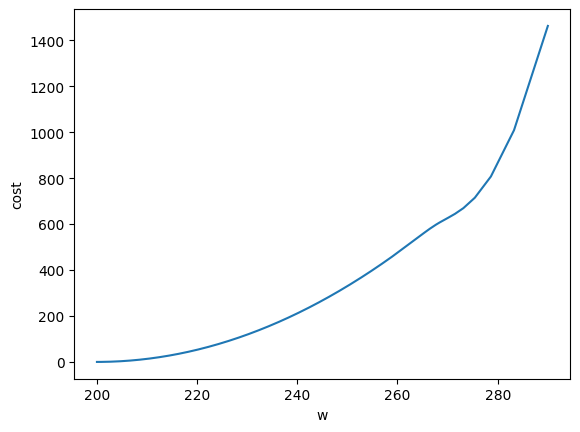

In [24]:
w_in = 300
b_in= 0
num_iters = 1000
alpha = 1.0e-1

gradient_descent(x_train, y_train, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient)

In [25]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = w_in
    b = b_in
    iter_list = []
    cost_list = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        iter_list.append(i)
        cost_list.append(cost_function(x, y, w, b))

    plt.plot(iter_list, cost_list)
    plt.xlabel('iteration')
    plt.ylabel('cost')

    print('w = ', w)
    print('b = ', b)

w =  95.2791604648489
b =  58.54371750885322


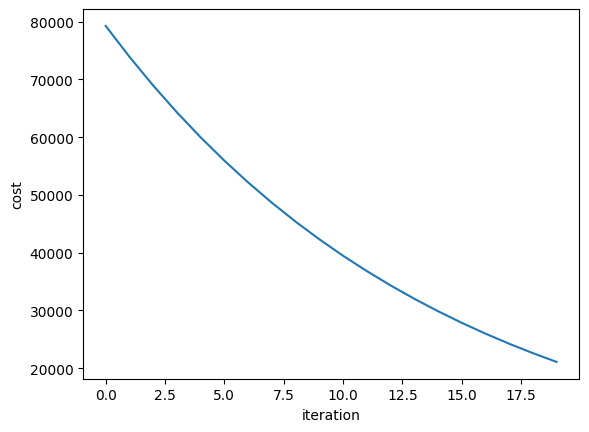

In [26]:
#impact of alpha on cost
w_in = 0
b_in= 0
num_iters = 20
alpha = 1.0e-2

gradient_descent(x_train, y_train, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient)

performance - loop vs np.dot

In [27]:
def my_dot(a, b): 
    x=0
    for i in range(a.shape[0]):
        x = x + a[i] * b[i]
    return x

In [28]:
np.random.seed(1)
a = np.random.rand(10000000)  # very large arrays
b = np.random.rand(10000000)

tic = time.time()  # capture start time
c = np.dot(a, b)
toc = time.time()  # capture end time

print(f"np.dot(a, b) =  {c:.4f}")
print(f"Vectorized version duration: {1000*(toc-tic):.4f} ms ")

tic = time.time()  # capture start time
c = my_dot(a,b)
toc = time.time()  # capture end time

print(f"my_dot(a, b) =  {c:.4f}")
print(f"loop version duration: {1000*(toc-tic):.4f} ms ")

del(a);del(b)  #remove these big arrays from memory

np.dot(a, b) =  2501072.5817
Vectorized version duration: 6.1309 ms 
my_dot(a, b) =  2501072.5817
loop version duration: 4211.1361 ms 


2D array

In [29]:
a = np.array([[5],  
              [4],   
              [3]]);
a.shape

(3, 1)

In [30]:
a = np.array([[5, 4, 3]]);
a.shape

(1, 3)

2D vector slicing operations

In [31]:
a = np.arange(20).reshape(-1, 10)
print(f"a = \n{a}")

#access 5 consecutive elements (start:stop:step)
print("a[0, 2:7:1] = ", a[0, 2:7:1], ",  a[0, 2:7:1].shape =", a[0, 2:7:1].shape, "a 1-D array")

#access 5 consecutive elements (start:stop:step) in two rows
print("a[:, 2:7:1] = \n", a[:, 2:7:1], ",  a[:, 2:7:1].shape =", a[:, 2:7:1].shape, "a 2-D array")

# access all elements
print("a[:,:] = \n", a[:,:], ",  a[:,:].shape =", a[:,:].shape)

# access all elements in one row (very common usage)
print("a[1,:] = ", a[1,:], ",  a[1,:].shape =", a[1,:].shape, "a 1-D array")
# same as
print("a[1]   = ", a[1],   ",  a[1].shape   =", a[1].shape, "a 1-D array")

# access all elements in one column
print("a[:,1] = ", a[:,1], ",  a[:,1].shape =", a[:,1].shape, "a 1-D array")


a = 
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]
a[0, 2:7:1] =  [2 3 4 5 6] ,  a[0, 2:7:1].shape = (5,) a 1-D array
a[:, 2:7:1] = 
 [[ 2  3  4  5  6]
 [12 13 14 15 16]] ,  a[:, 2:7:1].shape = (2, 5) a 2-D array
a[:,:] = 
 [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]] ,  a[:,:].shape = (2, 10)
a[1,:] =  [10 11 12 13 14 15 16 17 18 19] ,  a[1,:].shape = (10,) a 1-D array
a[1]   =  [10 11 12 13 14 15 16 17 18 19] ,  a[1].shape   = (10,) a 1-D array
a[:,1] =  [ 1 11] ,  a[:,1].shape = (2,) a 1-D array


Problem Statement

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$

$b$ is a scalar parameter.  

In [32]:
X_train = np.array([[2104, 5, 1, 45], 
                    [1416, 3, 2, 40], 
                    [852,  2, 1, 35]])

y_train = np.array([460, 232, 178])

In [33]:
b_init = 100
w_init = np.array([100, 100, 100, 100])

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

In [34]:
y1_pred = np.dot(w_init, X_train[0]) + b_init
y1_pred

np.int64(215600)

In [35]:
def compute_model_output(x, w, b):
    return np.dot(w, x) + b

In [36]:
def compute_cost(X, y, w, b): 
    m = X.shape[0]
    j_wb = 0
    for i in range(m):
        j_i = (compute_model_output(X[i], w, b) - y[i])**2
        j_wb = j_wb + j_i
    return j_wb/(2 * m)


In [37]:
compute_cost(X_train, y_train, w_init, b_init)

np.float64(12583166451.333334)

In [38]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    n = X.shape[1]
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        dj_dw = dj_dw + (compute_model_output(X[i], w, b) - y[i])*X[i]
        dj_db = dj_db + (compute_model_output(X[i], w, b) - y[i])
    return dj_dw/m, dj_db/m
    

In [39]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = w_in
    b = b_in
 
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)

    print('w = ', w)
    print('b = ', b)

    return w, b

In [40]:
w_in = np.array([0, 0, 0, 0])
b_in= 0
num_iters = 1000
alpha = 1.0e-7 #much smaller alpha required as data is not scaled

w, b = gradient_descent(X_train, y_train, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient)


w =  [ 0.20253263  0.00112386 -0.00213202 -0.00933401]
b =  -0.0003572563919114559


In [41]:
#model prediction for fist training data
print(compute_model_output(X_train[0], w, b))

425.71175692209044


Feature scaling

Three normalization techniques: 

- Feature scaling, essentially dividing each positive feature by its maximum value, or more generally, rescale each feature by both its minimum and maximum values using (x-min)/(max-min). Both ways normalizes features to the range of -1 and 1, where the former method works for positive features which is simple and serves well for the lecture's example, and the latter method works for any features.
- Mean normalization: $x_i := \dfrac{x_i - \mu_i}{max - min} $ 
- z-score normalization:

After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} $$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  
\end{align}
$$

In [42]:
def zscore_normalize_features(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu)/sigma

    return X_norm, mu, sigma

In [43]:
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)

In [44]:
w_in = np.array([0, 0, 0, 0])
b_in= 0
num_iters = 1000
alpha = 1.0e-1 #much larger alpha is sufficient as data is scaled

w, b = gradient_descent(X_norm, y_train, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient)

w =  [ 38.05161505  41.54327451 -30.98894656  36.34177447]
b =  289.9999999999998


In [45]:
#model prediction for fist training data
print(compute_model_output(X_norm[0], w, b))

459.9999999999998


In [46]:
#model prediction on new data
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma #used mu and sigma of training data
x_house_predict = np.dot(w, x_house_norm) + b
print(f'predicted house price : {x_house_predict*1000:.2f} dollars')


predicted house price : 281683.26 dollars


In [47]:
#load bigger dataset
data = np.loadtxt('./Course 1 - Week 2/Labs/data/houses.txt', delimiter=',')

In [48]:
data[:5, :]

array([[9.520e+02, 2.000e+00, 1.000e+00, 6.500e+01, 2.715e+02],
       [1.244e+03, 3.000e+00, 1.000e+00, 6.400e+01, 3.000e+02],
       [1.947e+03, 3.000e+00, 2.000e+00, 1.700e+01, 5.098e+02],
       [1.725e+03, 3.000e+00, 2.000e+00, 4.200e+01, 3.940e+02],
       [1.959e+03, 3.000e+00, 2.000e+00, 1.500e+01, 5.400e+02]])

In [49]:
X_train = data[:, :4]
y_train = data[:, 4]
X_features = ['size(sqft)','bedrooms','floors','age']

In [50]:
X_train[:5, :]


array([[9.520e+02, 2.000e+00, 1.000e+00, 6.500e+01],
       [1.244e+03, 3.000e+00, 1.000e+00, 6.400e+01],
       [1.947e+03, 3.000e+00, 2.000e+00, 1.700e+01],
       [1.725e+03, 3.000e+00, 2.000e+00, 4.200e+01],
       [1.959e+03, 3.000e+00, 2.000e+00, 1.500e+01]])

In [51]:
y_train[:5]

array([271.5, 300. , 509.8, 394. , 540. ])

Text(0, 0.5, "Price (1000's)")

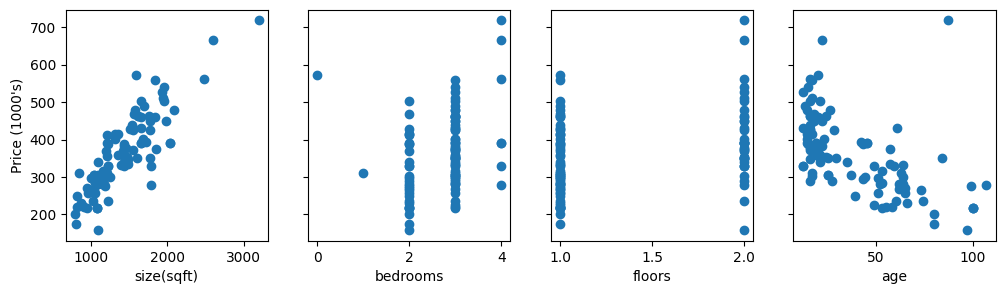

In [52]:
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")

Feature Engineering and Polynomial Regression

Feature engineering and polynomial regression  allows you to use the machinery of linear regression to fit very complicated, even very non-linear functions.

Out of the box, linear regression provides a means of building models of the form:
$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+ ... + w_{n-1}x_{n-1} + b \tag{1}$$ 
The 'machinery' we have is the ability to modify the parameters $\mathbf{w}$, $\mathbf{b}$ in (1) to 'fit' the equation to the training data. However, no amount of adjusting of $\mathbf{w}$,$\mathbf{b}$ in (1) will achieve a fit to a non-linear curve.

What is needed is something like $y= w_0x_0^2 + b$, or a **polynomial feature**.

To accomplish this, you can modify the *input data* to *engineer* the needed features. If you swap the original data with a version that squares the $x$ value, then you can achieve $y= w_0x_0^2 + b$.

It may not always be obvious which features are required. One could add a variety of potential features to try and find the most useful. For example, what if we had instead tried : $y=w_0x_0 + w_1x_1^2 + w_2x_2^3+b$ ? 


In [53]:
x = np.arange(0, 20, 1)
y = x ** 2 # target function is quadratic

X = np.c_[x, x**2, x**3] #modified input data to engineer the needed feature
X

array([[   0,    0,    0],
       [   1,    1,    1],
       [   2,    4,    8],
       [   3,    9,   27],
       [   4,   16,   64],
       [   5,   25,  125],
       [   6,   36,  216],
       [   7,   49,  343],
       [   8,   64,  512],
       [   9,   81,  729],
       [  10,  100, 1000],
       [  11,  121, 1331],
       [  12,  144, 1728],
       [  13,  169, 2197],
       [  14,  196, 2744],
       [  15,  225, 3375],
       [  16,  256, 4096],
       [  17,  289, 4913],
       [  18,  324, 5832],
       [  19,  361, 6859]])

In [54]:
w_in = np.zeros(X.shape[1])
b_in= 0
num_iters = 10000
alpha = 1.0e-7 

w, b = gradient_descent(X, y, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient)

w =  [0.08237526 0.53552137 0.02752216]
b =  0.01056185052956357


In [55]:
w

array([0.08237526, 0.53552137, 0.02752216])

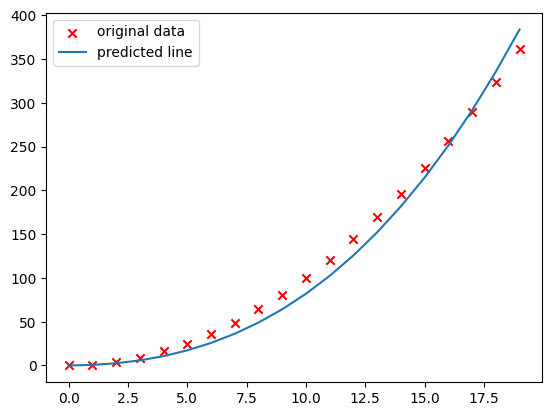

In [56]:
plt.scatter(x, y, marker = 'x', c = 'r', label = 'original data')
plt.plot(x, np.dot(X, w) + b, label = 'predicted line')
plt.legend()


Feature Engineering with Feature Scaling

In [57]:
X_norm, X_mu, X_sigma = zscore_normalize_features(X)

In [58]:
w_in = np.zeros(X.shape[1])
b_in= 0
num_iters = 100000
alpha = 1.0e-1

w, b = gradient_descent(X_norm, y, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient)

w =  [5.26616826e-05 1.13494579e+02 8.43238777e-05]
b =  123.49999999999994


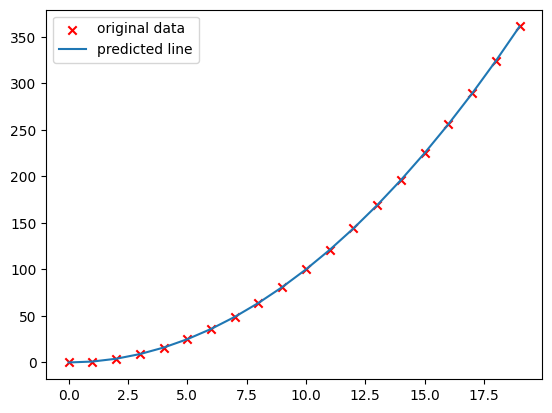

In [59]:
plt.scatter(x, y, marker = 'x', c = 'r', label = 'original data')
plt.plot(x, np.dot(X_norm, w) + b, label = 'predicted line')
plt.legend()

>Gradient descent is picking the 'correct' features for us by emphasizing its associated parameter

- less weight value implies less important/correct feature, and in extreme, when the weight becomes zero or very close to zero, the associated feature is not useful in fitting the model to the data.
- above, after fitting, the weight associated with the $x^2$ feature is much larger than the weights for $x$ or $x^3$ as it is the most useful in fitting the data. 

Complex Functions

With feature engineering, even quite complex functions can be modeled:

In [60]:
x = np.arange(0, 20, 1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12]


In [61]:
X_norm, X_mu, X_sigma = zscore_normalize_features(X)

In [62]:
w_in = np.zeros(X.shape[1])
b_in= 0
num_iters = 1000000
alpha = 1.0e-1

w, b = gradient_descent(X_norm, y, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient)

w =  [ -1.49911121  -9.57965227  25.72624957   4.394509   -14.60906626
 -16.64725914  -7.40836414   4.29145881  11.99112134  12.22680223
   3.80415686 -13.0614822 ]
b =  -0.007287194855839158


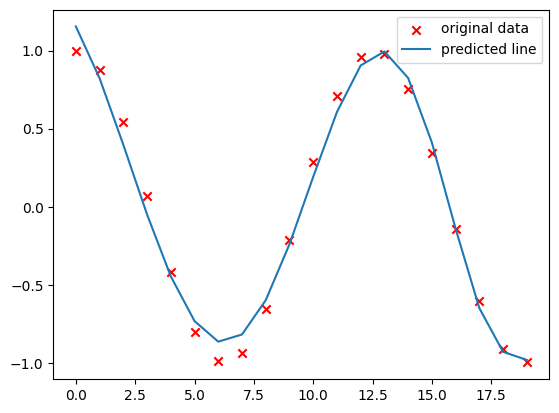

In [63]:
plt.scatter(x, y, marker = 'x', c = 'r', label = 'original data')
plt.plot(x, np.dot(X_norm, w) + b, label = 'predicted line')
plt.legend()